**1. Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

**2. To read the data into Python.**

In [2]:
college = pd.read_csv('cleaned_college_data.csv')
print(college.head())

                        College Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     yes  1660    1232     721         23   
1            Adelphi University     yes  2186    1924     512         16   
2                Adrian College     yes  1428    1097     336         22   
3           Agnes Scott College     yes   417     349     137         60   
4     Alaska Pacific University     yes   193     146      55         16   

   Top25perc  Fundergrad  Pundergrad  Outstate  RoomBoard  Books  Personal  \
0         52        2885         537      7440       3300    450      2200   
1         29        2683        1227     12280       6450    750      1500   
2         50        1036          99     11250       3750    400      1165   
3         89         510          63     12960       5450    450       875   
4         44         249         869      7560       4120    800      1500   

   PhD  Terminal  SFRatio  percalumni  Expend  GradRate  
0   70        78

In [3]:
numerical_cols = college.select_dtypes(include=np.number).columns

**3. Univariate Analysis: Analysis on numerical Variables**

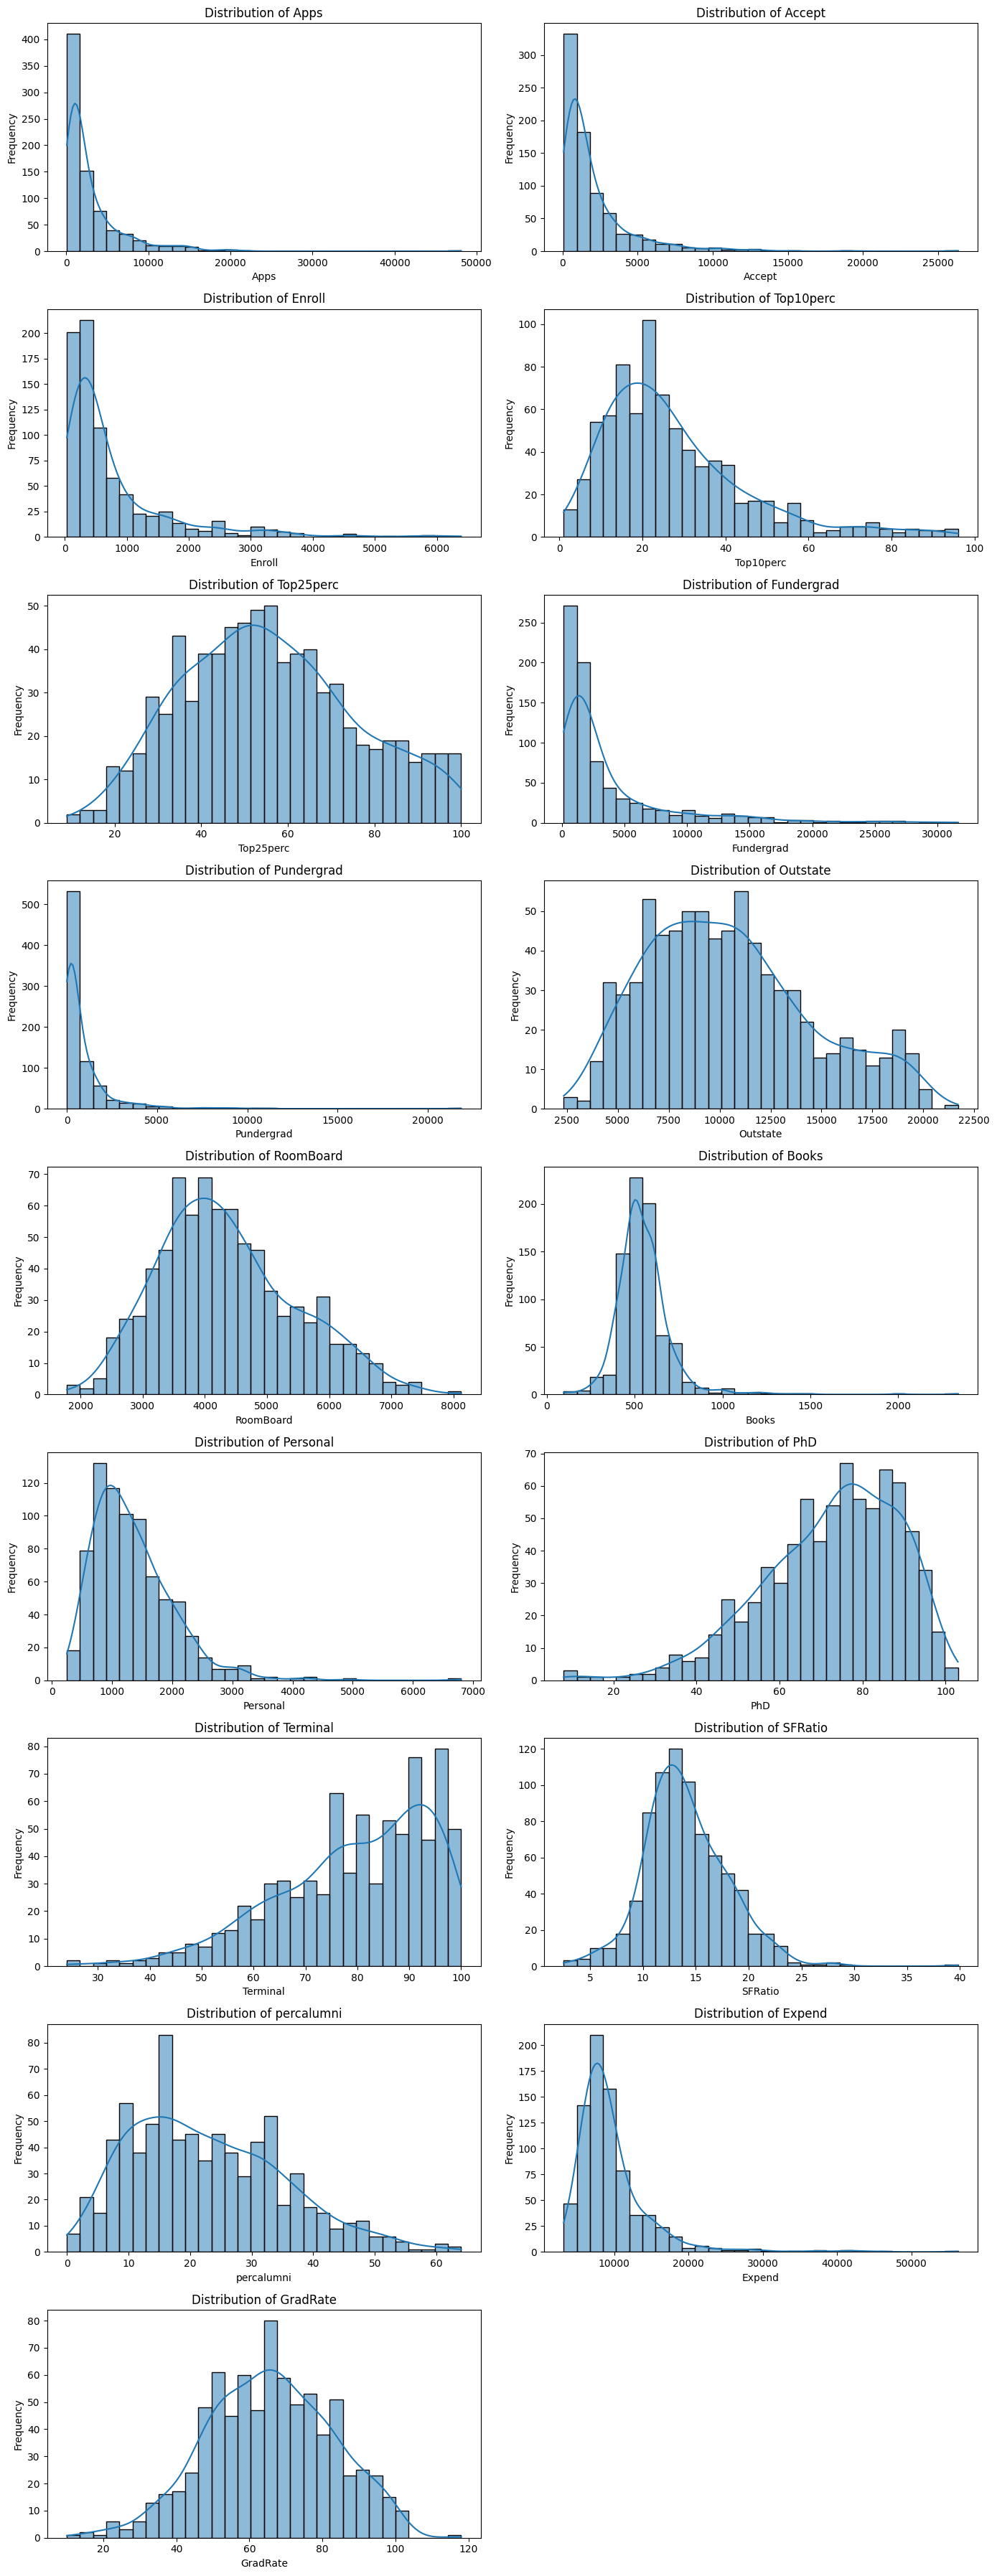

In [4]:
i=0
nrows = math.ceil(len(numerical_cols)/2)
plt.figure(figsize=(14, nrows * 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(nrows, 2, i + 1)
    sns.histplot(college[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

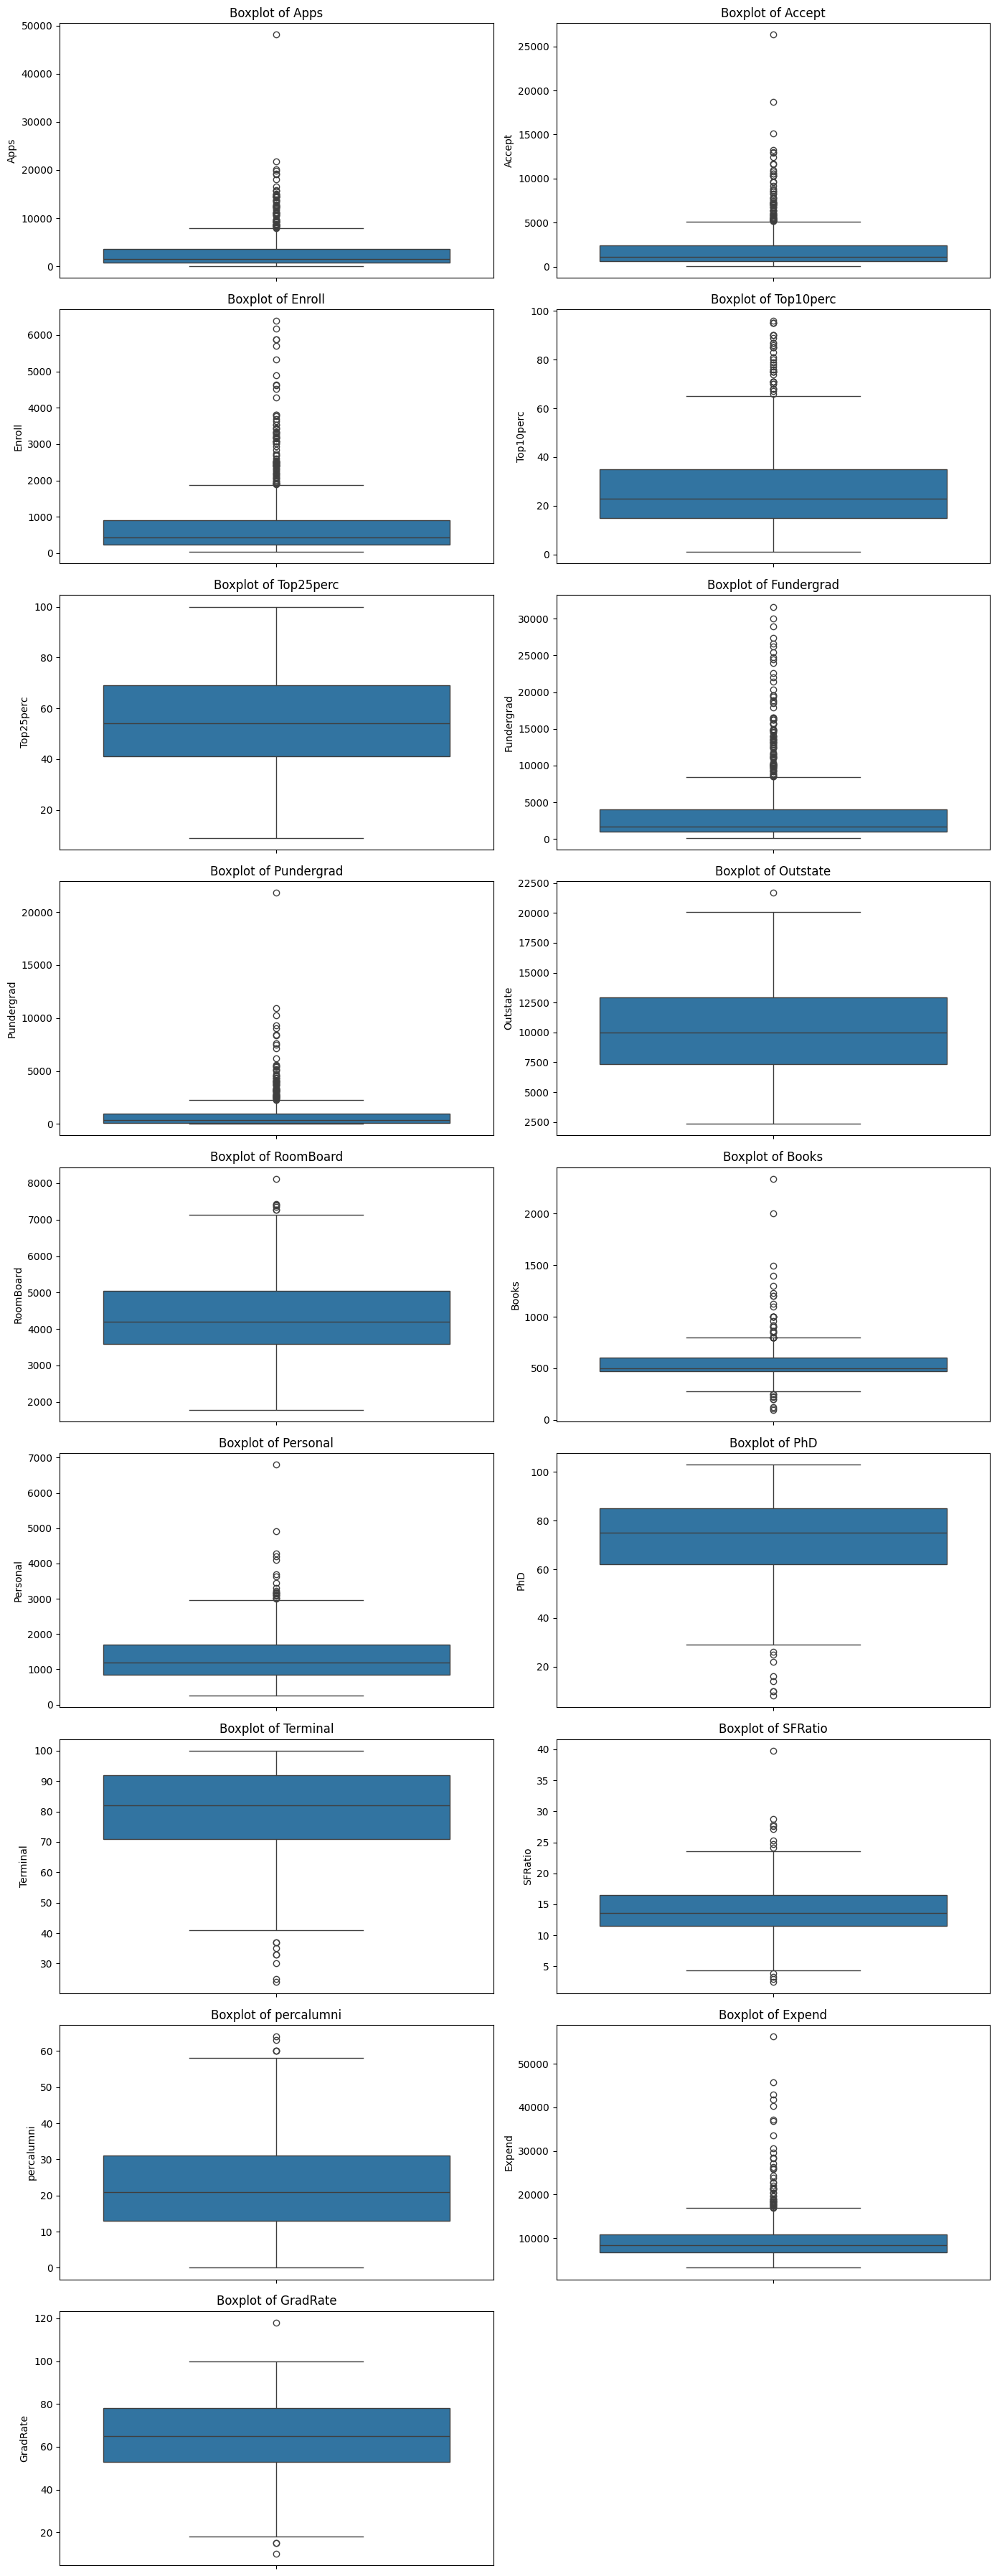

In [5]:
nrows = math.ceil(len(numerical_cols) / 2)
plt.figure(figsize=(14, nrows * 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(nrows, 2, i + 1)
    sns.boxplot(y=college[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**Conclusion of Step 3**

Beyond initial statistical checks, detailed univariate analysis using histogram and boxplots revealed the presence of additional, significant outliers in several key numerical attributes.

We conclude that the `Apps`, `Accept`, `Enroll`, `Top10perc`, `Fundergrad`, `Pundergrad`, `RoomBoard`, `Personal`, `percalumni`, and `Expend` attribute has **potential outliers & left-skewed**. The reasons are
* In histogram, most of the data points are concentrated on the left end, with a few values pulling the mean to the right.
* In box plot,
    - The median line is even little closer to the bottom of the box.
    - The space of the upper whisker is longer than the lower whisker.
    - Few Bubbles are plotted outside of the whisker which are actually the outliers.

We conclude that the `Phd`, and `Terminal` attribute has **potential outliers & right-skewed**. The reasons are
* In histogram, most of the data points are concentrated on the right end, with a few values pulling the mean to the left.
* In box plot,
    - The median line is even little closer to the top of the box.
    - The space of the lower whisker is longer than the upper whisker.
    - Few Bubbles are plotted outside of the whisker which are actually the outliers.

We conclude that the `Books`, and `SFRatio` attribute has **potential outliers**. The reasons are
* In histogram, most of the data points are concentrated on the right end, with a few values pulling the mean to the lef.
* In box plot,
    - The median line is even little closer to the bottom of the box.
    - The space of the upper whisker is longer than the lower whisker.
    - Few Bubbles are plotted outside of the whisker which are actually the outliers.

These points, largely representing plausible but exceptionally high or low characteristics of certain institutions, suggest that careful consideration of data transformation (e.g., log scaling) will be essential during preprocessing to manage their potential impact on machine learning model performance and to normalize feature distributions.

Plausible Extreme Value in `Outstate` Tuition:
* While the `Outstate` tuition boxplot clearly shows a distinct outlier (and its histogram exhibits a slight right-skewness due to it), this extreme value is interpreted as a legitimate data point representing a highly expensive institution, rather than a data error.
* Its presence highlights the significant range in tuition costs among the colleges.
* This observation suggests that
    * For linear-based ML models, data transformation (e.g., a log transformation) may be beneficial for this variable during the preprocessing phase.
    * For Tree-based models, compare between data transformed and original data.
* This would mitigate its disproportionate influence on certain machine learning models, ensuring the model's robustness for the majority of institutions.

The attribute `GradRate` has one outlier above the upper whisker which is actually data error since no college can have graduation rate above 100%. While the 2 points below the `GradRate` suggests presence of outliers.

The attribute `Top25perc` has no outliers which is concluded by no bubbles in the boxplot and distribution of data is symmetrical in histogram plot.

**4. Univariate Analysis: Analysis on Categorical Variables `Private`**

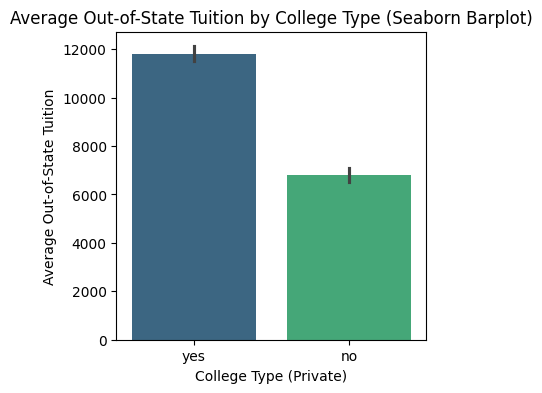

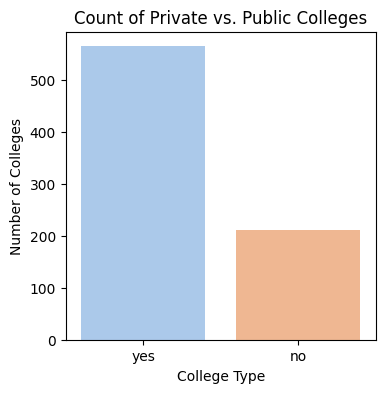

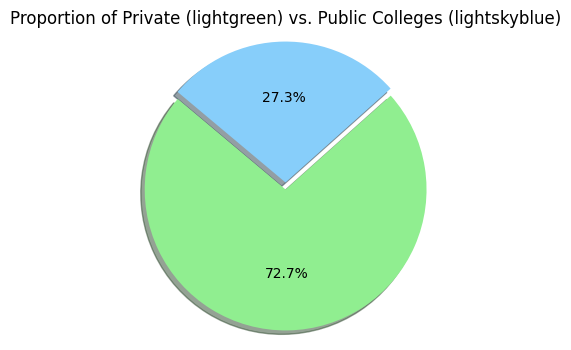

In [6]:
# --- 1. Bar Chart ---
plt.figure(figsize=(4, 4))
sns.barplot(x='Private', y='Outstate', data=college, palette='viridis', legend=False, hue='Private')
plt.title('Average Out-of-State Tuition by College Type (Seaborn Barplot)')
plt.xlabel('College Type (Private)')
plt.ylabel('Average Out-of-State Tuition')
plt.show()


# --- 2. Count Plot ---
plt.figure(figsize=(4, 4))
sns.countplot(x='Private', data=college, palette='pastel', hue='Private', legend=False)
plt.title('Count of Private vs. Public Colleges')
plt.xlabel('College Type')
plt.ylabel('Number of Colleges')
plt.show()


# --- 3. Pie Chart ---
private_counts = college['Private'].value_counts()
labels = private_counts.index
sizes = private_counts.values
colors = ['lightgreen', 'lightskyblue']
explode = (0.05, 0)

plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Private (lightgreen) vs. Public Colleges (lightskyblue)')
plt.axis('equal')
plt.show()

**Conclusion of Step 4**

We have `private` categorical column which says
- There are significantly more private colleges (72.7%) than public colleges (27.3%) in this dataset.
- Private colleges, on average, have much higher out-of-state tuition than public colleges.
- The dataset is imbalanced, with a higher proportion of private institutions. This is crucial to build a classification model to predict 'Private' status, as imbalanced data can affect model performance.
- These charts can be used for presentation of data based on the requirement for the future use.

We have already done the univariate analysis for some numerical variables and confirmed the distribution of each of them and clearly identified the presence of outliers.

**5. Explore Relationship between variables: Correlation Coefficient Heatmap**

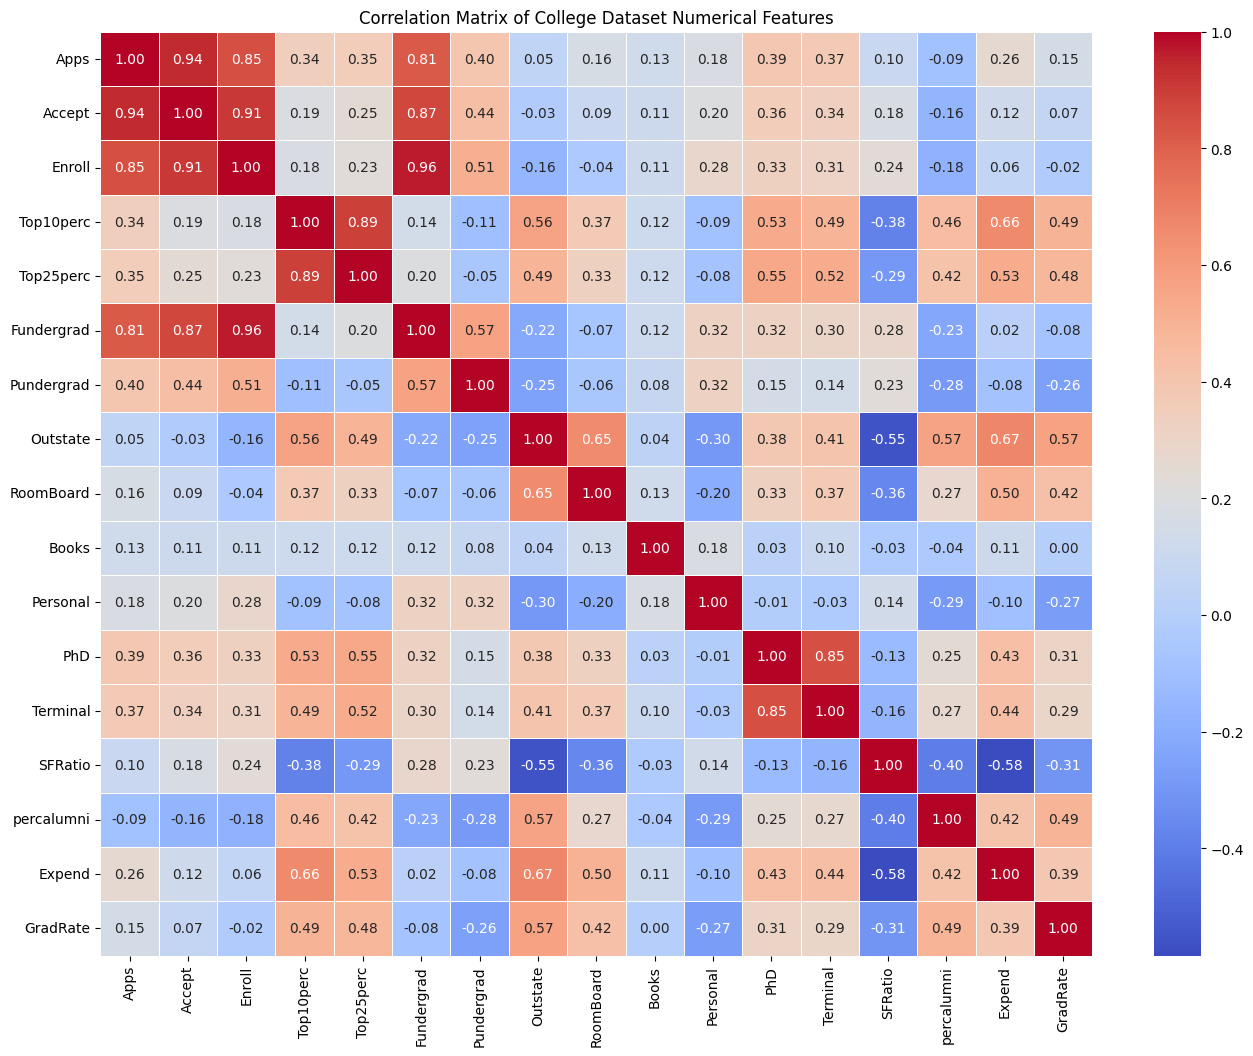

In [7]:
# Calculate the correlation matrix
correlation_matrix = college[numerical_cols].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of College Dataset Numerical Features')
plt.show()

**Conclusion of Step 5**

So, From the above correlation coefficient Heatmap, we can infer that,
* As attribute `Apps` increases `Accept` also increases => Which means, colleges receiving more applications tend to accept a greater number of students.
* Similarly,
    - `Accept` increases -> `Enroll` will also increase
    - `Apps`, or `Accept` or 'Enroll` increases -> `F.Undergrad` will also increase => No. of Full-time Undergraduates increases because they are enrolling more. larger institutions, characterized by higher application and acceptance volumes, generally have a greater number of full-time undergraduate students
    - `PhD` increases -> `Terminal` increases -> Faculties with Terminal degree are growing as lot of students studies PhD increases.
    - `S.F.Ration` decreases -> `Expend` increases -> As the student-to-faculty ratio decreases (meaning more faculty per student, or smaller class sizes), the instructional expenditure per student tends to increase.

**6. Bivariate Analysis: Numerical Vs Numerical (with hue='Private')**


--- Bivariate Analysis: Numerical vs. Numerical (with hue='Private') ---


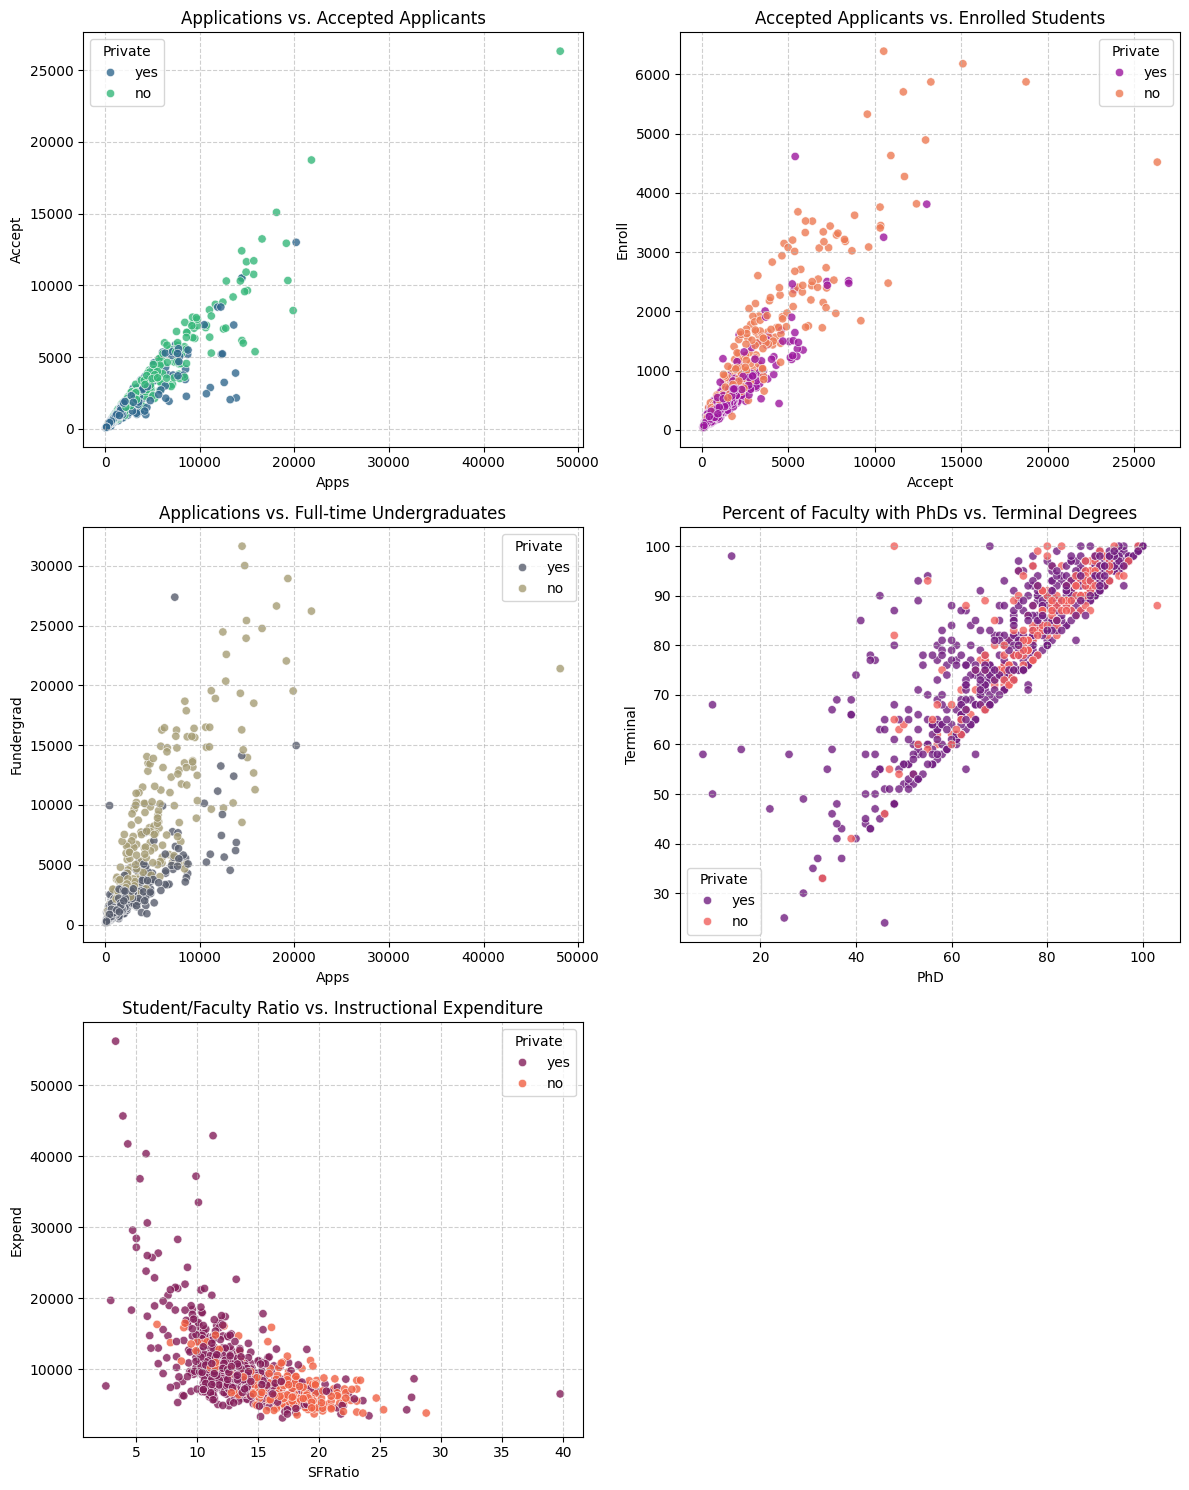

In [8]:
print("\n--- Bivariate Analysis: Numerical vs. Numerical (with hue='Private') ---")

plots_to_generate = [
    ('Apps', 'Accept', 'Applications vs. Accepted Applicants', 'viridis'),
    ('Accept', 'Enroll', 'Accepted Applicants vs. Enrolled Students', 'plasma'),
    ('Apps', 'Fundergrad', 'Applications vs. Full-time Undergraduates', 'cividis'),
    ('PhD', 'Terminal', 'Percent of Faculty with PhDs vs. Terminal Degrees', 'magma'),
    ('SFRatio', 'Expend', 'Student/Faculty Ratio vs. Instructional Expenditure', 'rocket')
]

num_plots = len(plots_to_generate)
nrows = math.ceil(num_plots / 2)
plt.figure(figsize=(12, nrows * 5))

for i, (x_col, y_col, title, palette) in enumerate(plots_to_generate):
    plt.subplot(nrows, 2, i + 1)
    sns.scatterplot(x=x_col, y=y_col, data=college, hue='Private', palette=palette, alpha=0.8)
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

**Conclusion of 6:**

The scatter plot of following variables shows a positive **linear relationship**:
- Applications vs. Accepted Applicants
- Accepted Applicants vs. Enrolled Students
- Applications vs. Full-time Undergraduates
- Percent of Faculty with PhDs vs. Terminal Degrees

But 'Student/Faculty Ratio vs. Instructional Expenditure' shows an **inverse relationship**. It shows that as one variable (`S.F.Ratio`) increases, the other (`Expend`) decreases, but in a non-linear way, dropping off sharply at first.

In the first three plots, Private colleges (Yes) are clustered in the lower-left, while Public colleges (No) have a much wider spread and operate at a larger scale.
The plot clearly shows a few high-volume outliers as well.

**7. Bivariate Analysis: Numerical vs. Categorical (using Box Plots)**


--- Bivariate Analysis: Numerical vs. Categorical (using Box Plots) ---


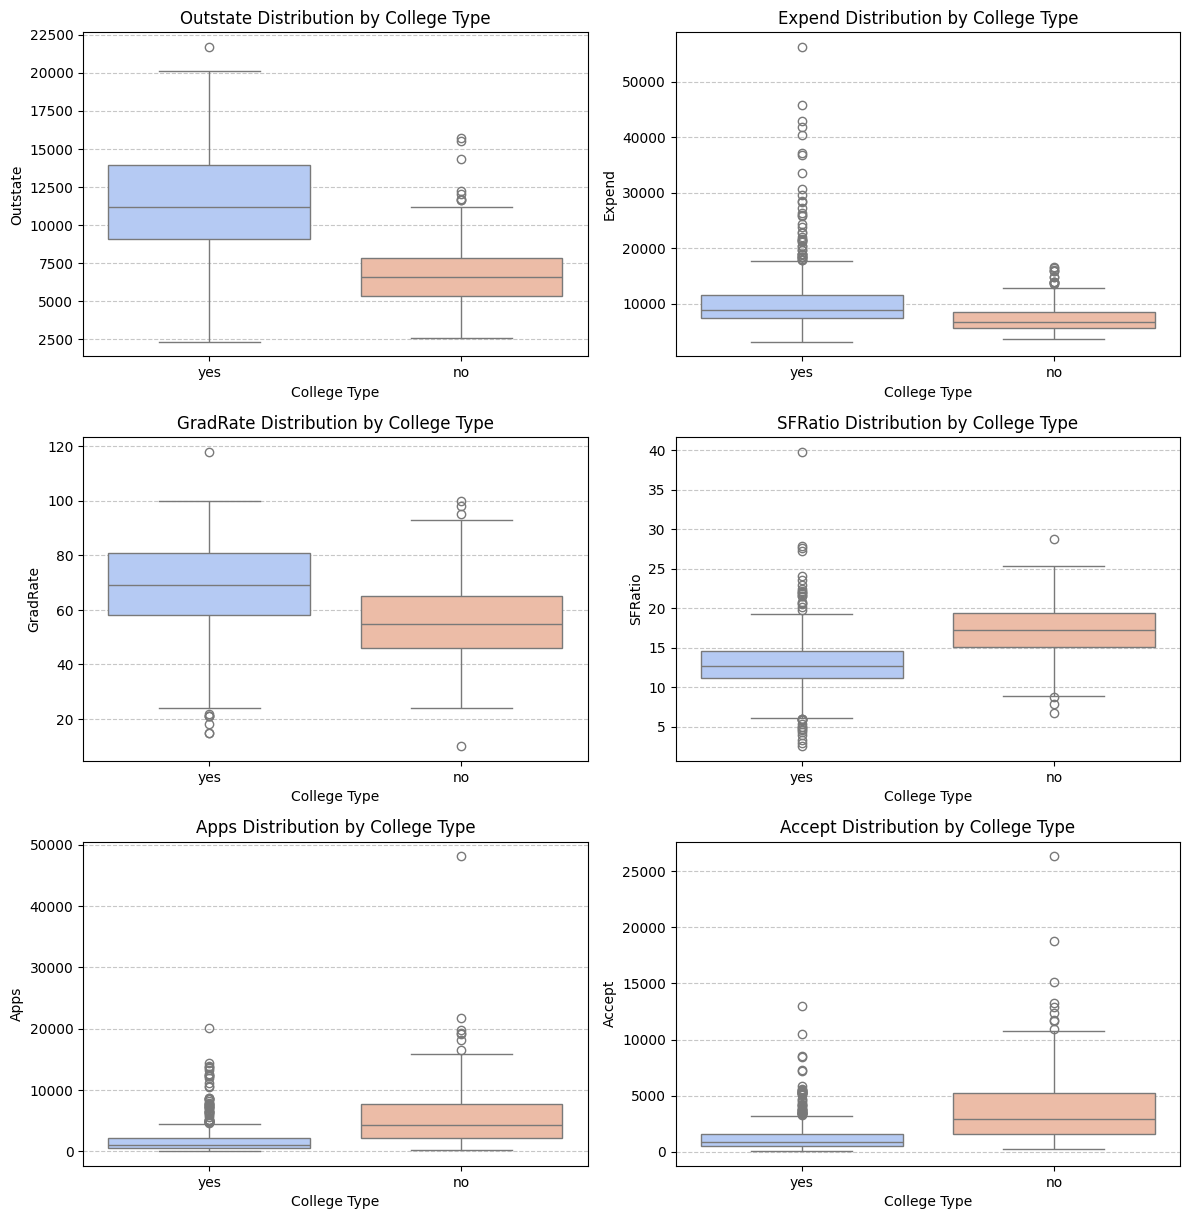

In [9]:
print("\n--- Bivariate Analysis: Numerical vs. Categorical (using Box Plots) ---")

variables_to_compare = ['Outstate', 'Expend', 'GradRate', 'SFRatio', 'Apps', 'Accept']

plt.figure(figsize=(12, len(variables_to_compare) * 4))

for i, var in enumerate(variables_to_compare):
    plt.subplot(len(variables_to_compare), 2, i + 1)
    sns.boxplot(x='Private', y=var, data=college, palette='coolwarm', hue='Private')
    plt.title(f'{var} Distribution by College Type')
    plt.xlabel('College Type')
    plt.ylabel(var)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Conclusion of step 7:**

*Out-of-state-tution fee (Outstate):*
- The box plot for 'Private Colleges' (labeled 'Yes' on the x-axis) shows a significant number of outliers above the upper whisker, indicating several private colleges have an exceptionally high out-of-state tuition compared to the majority of private colleges. The single highest outlier is the most expensive, but there are others that are also considerably higher.
- The public colleges (labeled 'No') have a much tighter box, indicating less variability in their out-of-state tuition. The highest outlier for public colleges is indeed roughly equal to the median (the line inside the box) of the private colleges, which is a key insight. This suggests that even the most expensive public college has tuition that is only comparable to the *average* private college.

*Instructional expenditure (Expend):*
- The private college box plot shows numerous outliers, with some having an instructional expenditure per student that is significantly higher than the rest of the private colleges. This indicates a few institutions are spending a disproportionately large amount on instruction per student.
- The maximum expenditure for a public college is at a level that is still well within the normal range (within the upper whisker) of instructional spending for private colleges. This highlights a clear difference in the scale of spending between the two types of institutions.

*Graduation Rate (Grad.Rate):*
- The outliers with a very low graduation rate in private colleges shows that some private institutions have significantly poor outcomes in this regard and there is one data error as well (>100%)
- The box plot for public colleges shows a clear outlier at the lower end, and a cluster of outliers at the upper end. These upper outliers are correctly identified as colleges with exceptionally high graduation rates, close to 100%. While this is a positive finding for those specific colleges, they are still considered outliers because they are statistically distinct from the rest of the public colleges in the dataset.

*Student-Faculty Ratio (S.F.Ratio):*
- The private college box plot has outliers at both the lower and upper ends, meaning some private colleges have an extremely low student-faculty ratio (more faculty per student), while others have a very high ratio. This indicates a wider range of experiences at private institutions.
- The outliers in the public college box plot are at the higher end, indicating that a few public colleges indeed have a less favorable ratio, with a maximum of around 25 students per faculty member, as you noted. This contrasts with the median for both public and private colleges, which is much lower.

*Application and Acceptance Distributions (Apps & Accept):*
- The box plots for both `Apps` and `Accept` show a significant number of private colleges that receive and accept an extremely high number of students compared to their peers. This suggests that some private institutions are either very large or extremely popular, or both. The public colleges also have a few outliers, but the scale of the outliers for private colleges is much larger, as seen by the higher y-axis values.

Feature Selection: By looking at the correlations and scatter plots, its identified which variables are likely to be `good predictors` (Apps, Accept, S.F.Ratio, Expend) and also that some variables are so strongly correlated with each other (PhD and Terminal) and only need to use one to `avoid multicollinearity` in your model.

Feature Engineering: The S.F.Ratio vs. Expend relationship is non-linear (inverse). This tells  that a simple linear regression model might not work well for these variables. So need to apply a data transformation (like a log transformation) to these variables before feeding them into your model to improve its performance.

**8. Bivariate Analysis with the Target variable**


--- Bivariate Analysis: Numerical vs. Target Variable (with hue='Private') ---


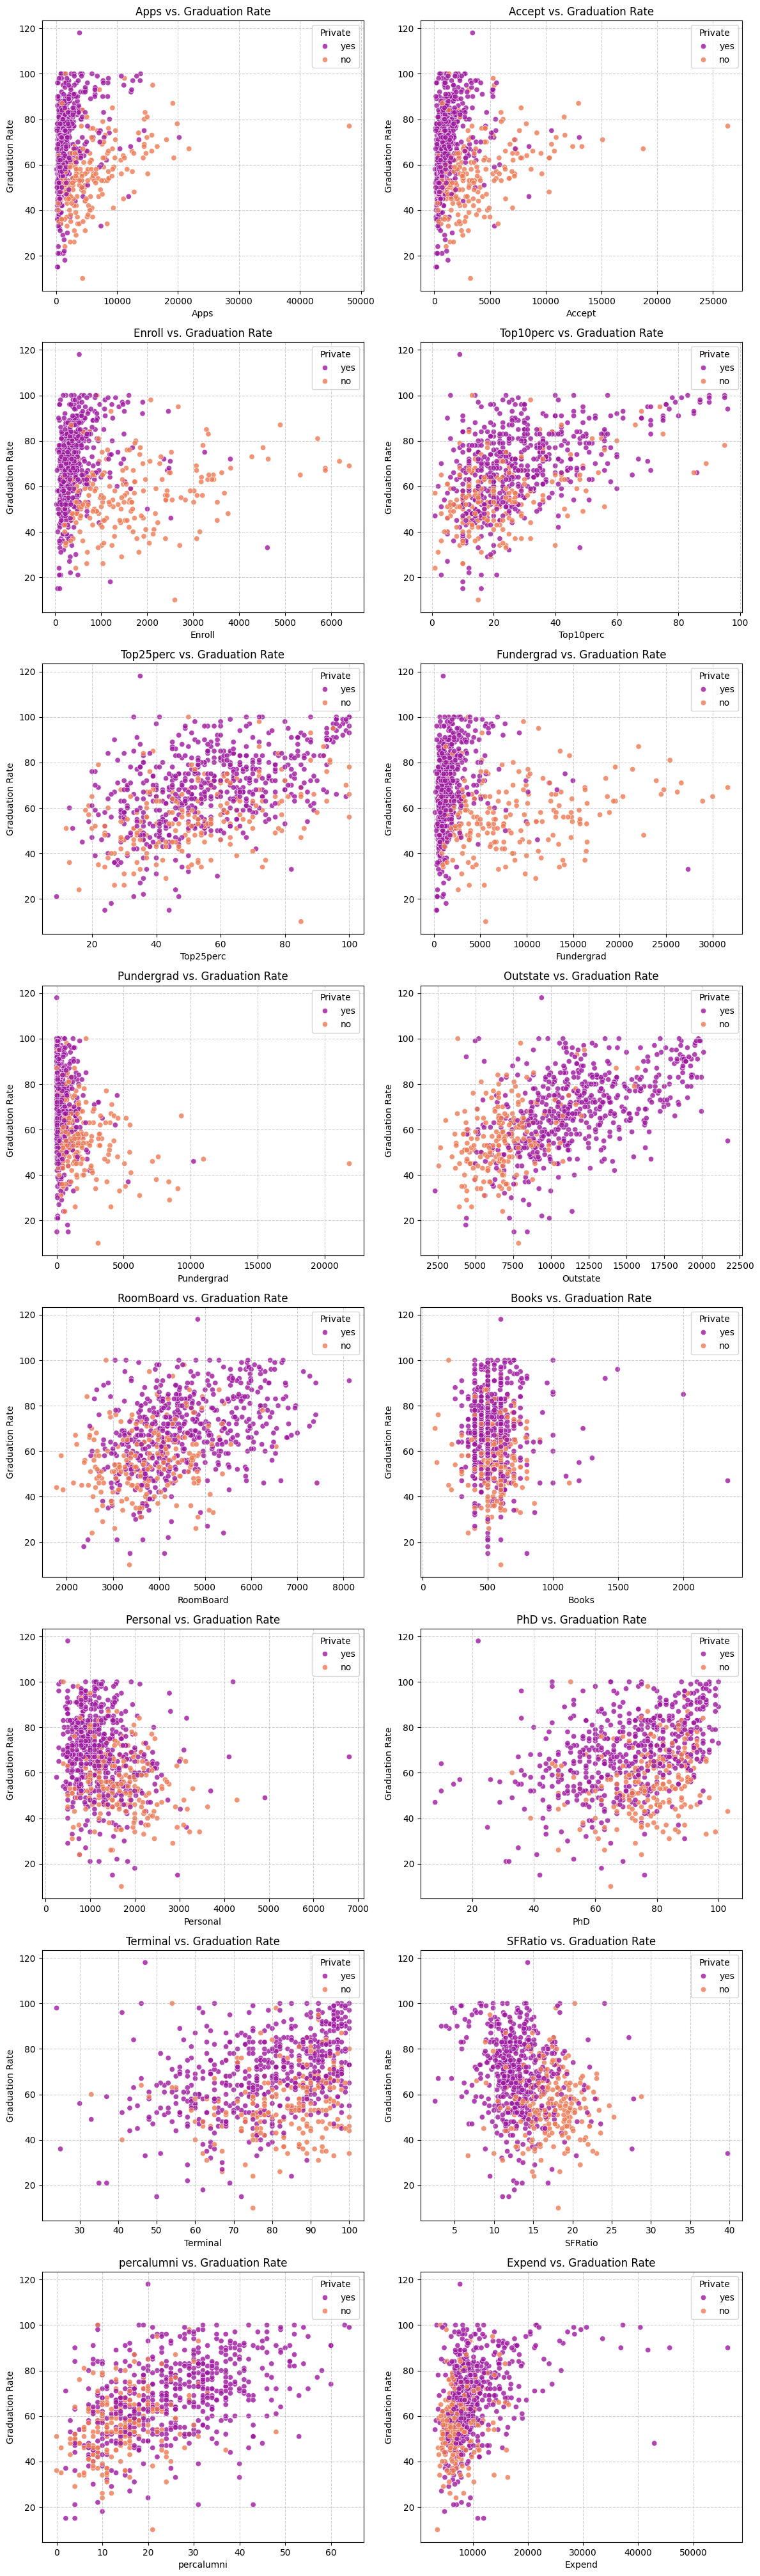

In [11]:
print("\n--- Bivariate Analysis: Numerical vs. Target Variable (with hue='Private') ---")

nrows = math.ceil(len(numerical_cols) / 2)
plt.figure(figsize=(12, nrows * 5))

for i, x_col in enumerate(numerical_cols):
    if x_col == 'GradRate':
        continue
    plt.subplot(nrows, 2, i + 1)
    sns.scatterplot(x=x_col, y='GradRate', data=college, hue='Private', palette='plasma', alpha=0.8)
    plt.title(x_col + " vs. Graduation Rate")
    plt.xlabel(x_col)
    plt.ylabel('Graduation Rate')
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
